**1. Introduction**



As I am in the initial stages of developing my data science and singer-songwriting careers, I thought it would be appropriate to bring both fields together to inform my analysis and songwriting skills. For this short project, I will be predicting the popularity of songs based purely on song metrics such as key, dancibility, and acousticness. Year, artist, era, and genre will not be included. 


**2. Import Packages**

In [1]:
import numpy as np 
import pandas as pd # for working with dataframes
import seaborn as sns # for data visualization 

from matplotlib import pyplot as plt # for plotting
%matplotlib inline
sns.set_style("whitegrid")

import warnings # http://blog.johnmuellerbooks.com/2015/11/30/warnings-in-python-and-anaconda/
warnings.filterwarnings("ignore")

**3. Loading and Viewing Dataset**

We load the dataset and look at the overall statistics such as mean, count, and median.

In [2]:
dataframe = pd.read_csv('dt/SpotifyFeatures.csv')
dataframe.head()

genre        artist_name                        track_name  \
0  Movie     Henri Salvador       C'est beau de faire un Show   
1  Movie  Martin & les fées  Perdu d'avance (par Gad Elmaleh)   
2  Movie    Joseph Williams    Don't Let Me Be Lonely Tonight   
3  Movie     Henri Salvador    Dis-moi Monsieur Gordon Cooper   
4  Movie       Fabien Nataf                         Ouverture   

                 track_id  popularity  acousticness  danceability  \
0  0BRjO6ga9RKCKjfDqeFgWV           0         0.611         0.389   
1  0BjC1NfoEOOusryehmNudP           1         0.246         0.590   
2  0CoSDzoNIKCRs124s9uTVy           3         0.952         0.663   
3  0Gc6TVm52BwZD07Ki6tIvf           0         0.703         0.240   
4  0IuslXpMROHdEPvSl1fTQK           4         0.950         0.331   

   duration_ms  energy  instrumentalness key  liveness  loudness   mode  \
0        99373   0.910             0.000  C#    0.3460    -1.828  Major   
1       137373   0.737             0.000  F#    0.1510    -5.559  Minor   
2       170267   0.131             0.000   C    0.1030   -13.879  Minor   
3       152427   0.326             0.000  C#    0.0985   -12.178  Major   
4        82625   0.225             0.123   F    0.2020   -21.150  Major   

   speechiness    tempo time_signature  valence  
0       0.0525  166.969            4/4    0.814  
1       0.0868  174.003            4/4    0.816  
2       0.0362   99.488            5/4    0.368  
3       0.0395  171.758            4/4    0.227  
4       0.0456  140.576            4/4    0.390

In [3]:
dataframe.describe()

popularity   acousticness   danceability   duration_ms  \
count  232725.000000  232725.000000  232725.000000  2.327250e+05   
mean       41.127502       0.368560       0.554364  2.351223e+05   
std        18.189948       0.354768       0.185608  1.189359e+05   
min         0.000000       0.000000       0.056900  1.538700e+04   
25%        29.000000       0.037600       0.435000  1.828570e+05   
50%        43.000000       0.232000       0.571000  2.204270e+05   
75%        55.000000       0.722000       0.692000  2.657680e+05   
max       100.000000       0.996000       0.989000  5.552917e+06   

              energy  instrumentalness       liveness       loudness  \
count  232725.000000     232725.000000  232725.000000  232725.000000   
mean        0.570958          0.148301       0.215009      -9.569885   
std         0.263456          0.302768       0.198273       5.998204   
min         0.000020          0.000000       0.009670     -52.457000   
25%         0.385000          0.000000       0.097400     -11.771000   
50%         0.605000          0.000044       0.128000      -7.762000   
75%         0.787000          0.035800       0.264000      -5.501000   
max         0.999000          0.999000       1.000000       3.744000   

         speechiness          tempo        valence  
count  232725.000000  232725.000000  232725.000000  
mean        0.120765     117.666585       0.454917  
std         0.185518      30.898907       0.260065  
min         0.022200      30.379000       0.000000  
25%         0.036700      92.959000       0.237000  
50%         0.050100     115.778000       0.444000  
75%         0.105000     139.054000       0.660000  
max         0.967000     242.903000       1.000000

In [4]:
print(dataframe.keys())

Index(['genre', 'artist_name', 'track_name', 'track_id', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')


A link to the definitions of these features is shown here: https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/

**4. Cleaning NaN Values**

We check for null values. 

In [5]:
pd.isnull(dataframe).sum()

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

Since there are no null values, we don't have to worry about filling in missing information. 

**5. Exploratory Analysis**

We investigate overall trends in the data to get a good idea of which variables correlate with each other as well as other associations.

Text(0.5, 1.0, 'Popularity Distribution')

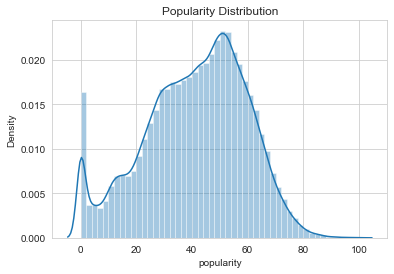

In [6]:
sns.distplot(dataframe['popularity']).set_title('Popularity Distribution')

In [7]:
dataframe.corr()

popularity  acousticness  danceability  duration_ms  \
popularity          1.000000     -0.381295      0.256564     0.002348   
acousticness       -0.381295      1.000000     -0.364546     0.011203   
danceability        0.256564     -0.364546      1.000000    -0.125781   
duration_ms         0.002348      0.011203     -0.125781     1.000000   
energy              0.248922     -0.725576      0.325807    -0.030550   
instrumentalness   -0.210983      0.316154     -0.364941     0.076021   
liveness           -0.167995      0.069004     -0.041684     0.023783   
loudness            0.363011     -0.690202      0.438668    -0.047618   
speechiness        -0.151076      0.150935      0.134560    -0.016171   
tempo               0.081039     -0.238247      0.021939    -0.028456   
valence             0.060076     -0.325798      0.547154    -0.141811   

                    energy  instrumentalness  liveness  loudness  speechiness  \
popularity        0.248922         -0.210983 -0.167995  0.363011    -0.151076   
acousticness     -0.725576          0.316154  0.069004 -0.690202     0.150935   
danceability      0.325807         -0.364941 -0.041684  0.438668     0.134560   
duration_ms      -0.030550          0.076021  0.023783 -0.047618    -0.016171   
energy            1.000000         -0.378957  0.192801  0.816088     0.145120   
instrumentalness -0.378957          1.000000 -0.134198 -0.506320    -0.177147   
liveness          0.192801         -0.134198  1.000000  0.045686     0.510147   
loudness          0.816088         -0.506320  0.045686  1.000000    -0.002273   
speechiness       0.145120         -0.177147  0.510147 -0.002273     1.000000   
tempo             0.228774         -0.104133 -0.051355  0.228364    -0.081541   
valence           0.436771         -0.307522  0.011804  0.399901     0.023842   

                     tempo   valence  
popularity        0.081039  0.060076  
acousticness     -0.238247 -0.325798  
danceability      0.021939  0.547154  
duration_ms      -0.028456 -0.141811  
energy            0.228774  0.436771  
instrumentalness -0.104133 -0.307522  
liveness         -0.051355  0.011804  
loudness          0.228364  0.399901  
speechiness      -0.081541  0.023842  
tempo             1.000000  0.134857  
valence           0.134857  1.000000

Text(0.5, 1.0, 'Popularity Based on Time Signature')

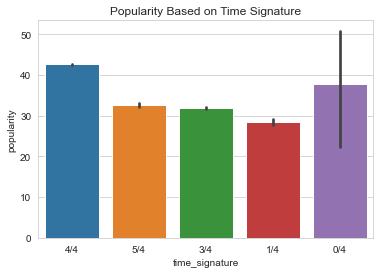

In [8]:
sns.barplot(x = 'time_signature', y = 'popularity', data = dataframe)
plt.title('Popularity Based on Time Signature')

Text(0.5, 1.0, 'Popularity Based on Key')

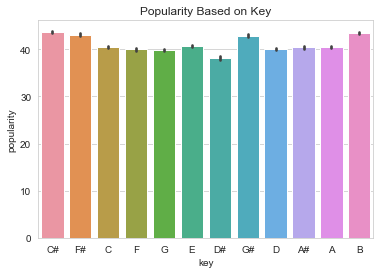

In [9]:
sns.barplot(x = 'key', y = 'popularity', data = dataframe)
plt.title('Popularity Based on Key')

Text(0.5, 1.0, 'Popularity Based on Mode')

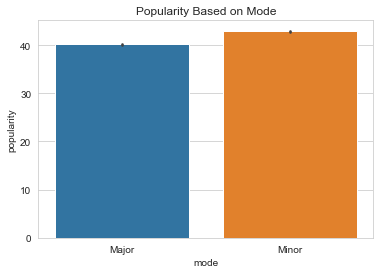

In [10]:
sns.barplot(x = 'mode', y = 'popularity', data = dataframe)
plt.title('Popularity Based on Mode')

Since key and mode are related (there can be A major or A minor), we combine those two features in another barplot using "hue". 

Text(0.5, 1.0, 'Popularity Based on Mode and Key')

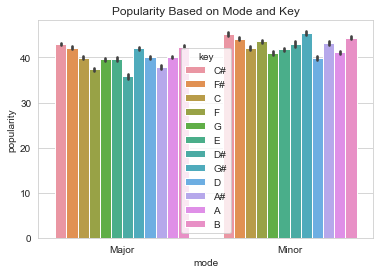

In [11]:
sns.barplot(x = 'mode', y = 'popularity', hue = 'key', data = dataframe)
plt.title('Popularity Based on Mode and Key')

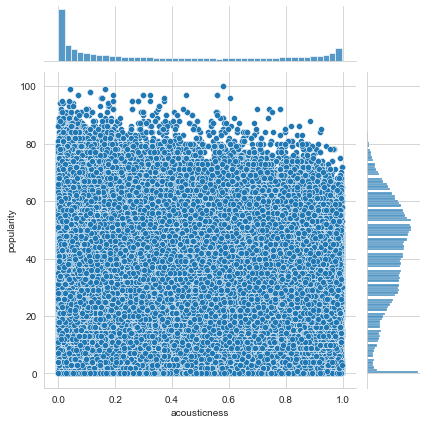

In [12]:
sns.jointplot(x = 'acousticness', y = 'popularity', data = dataframe)

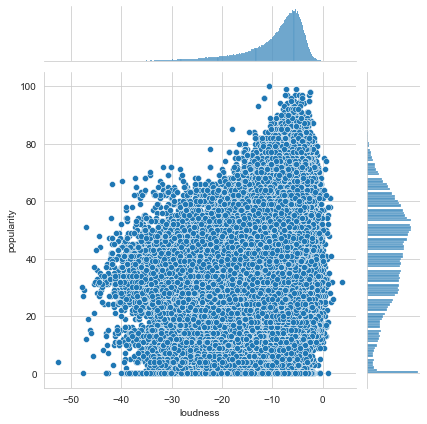

In [13]:
sns.jointplot(x = 'loudness', y = 'popularity', data = dataframe)

Text(0.5, 1.0, 'Acoustiness for Songs with More than 50 Popularity')

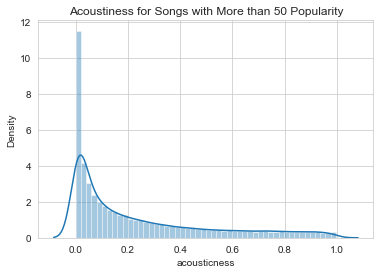

In [14]:
popular_above_50 = dataframe[dataframe.popularity > 50]
sns.distplot(popular_above_50['acousticness'])
plt.title('Acoustiness for Songs with More than 50 Popularity')

Text(0.5, 1.0, 'Acoustiness for Songs with Less than 50 Popularity')

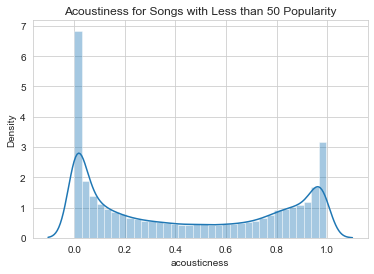

In [15]:
popular_below_50 = dataframe[dataframe.popularity < 50]
sns.distplot(popular_below_50['acousticness'])
plt.title('Acoustiness for Songs with Less than 50 Popularity')

Text(0.5, 1.0, 'Loudness for Songs with More than 50 Popularity')

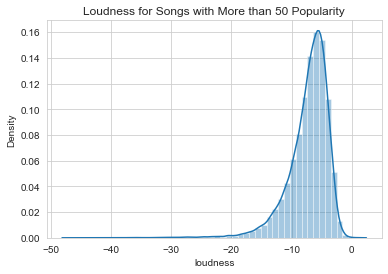

In [16]:
sns.distplot(popular_above_50['loudness'])
plt.title('Loudness for Songs with More than 50 Popularity')
 

Text(0.5, 1.0, 'Loudness for Songs with Less than 50 Popularity')

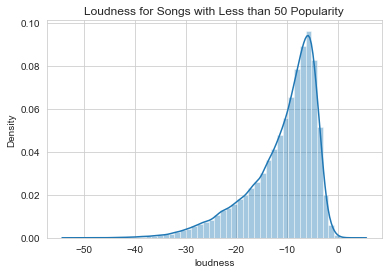

In [17]:
popular_below_50 = dataframe[dataframe.popularity < 50]
sns.distplot(popular_below_50['loudness'])
plt.title('Loudness for Songs with Less than 50 Popularity')

From this analysis, there loudness" and acousticness features have medium-weak correlations with popularity. Furthermore, the distributions of loudness and acousticness differ for songs with more than 50 popularity vs. songs with less than 50 popularity. We plot a summary of all relationships between the features. 

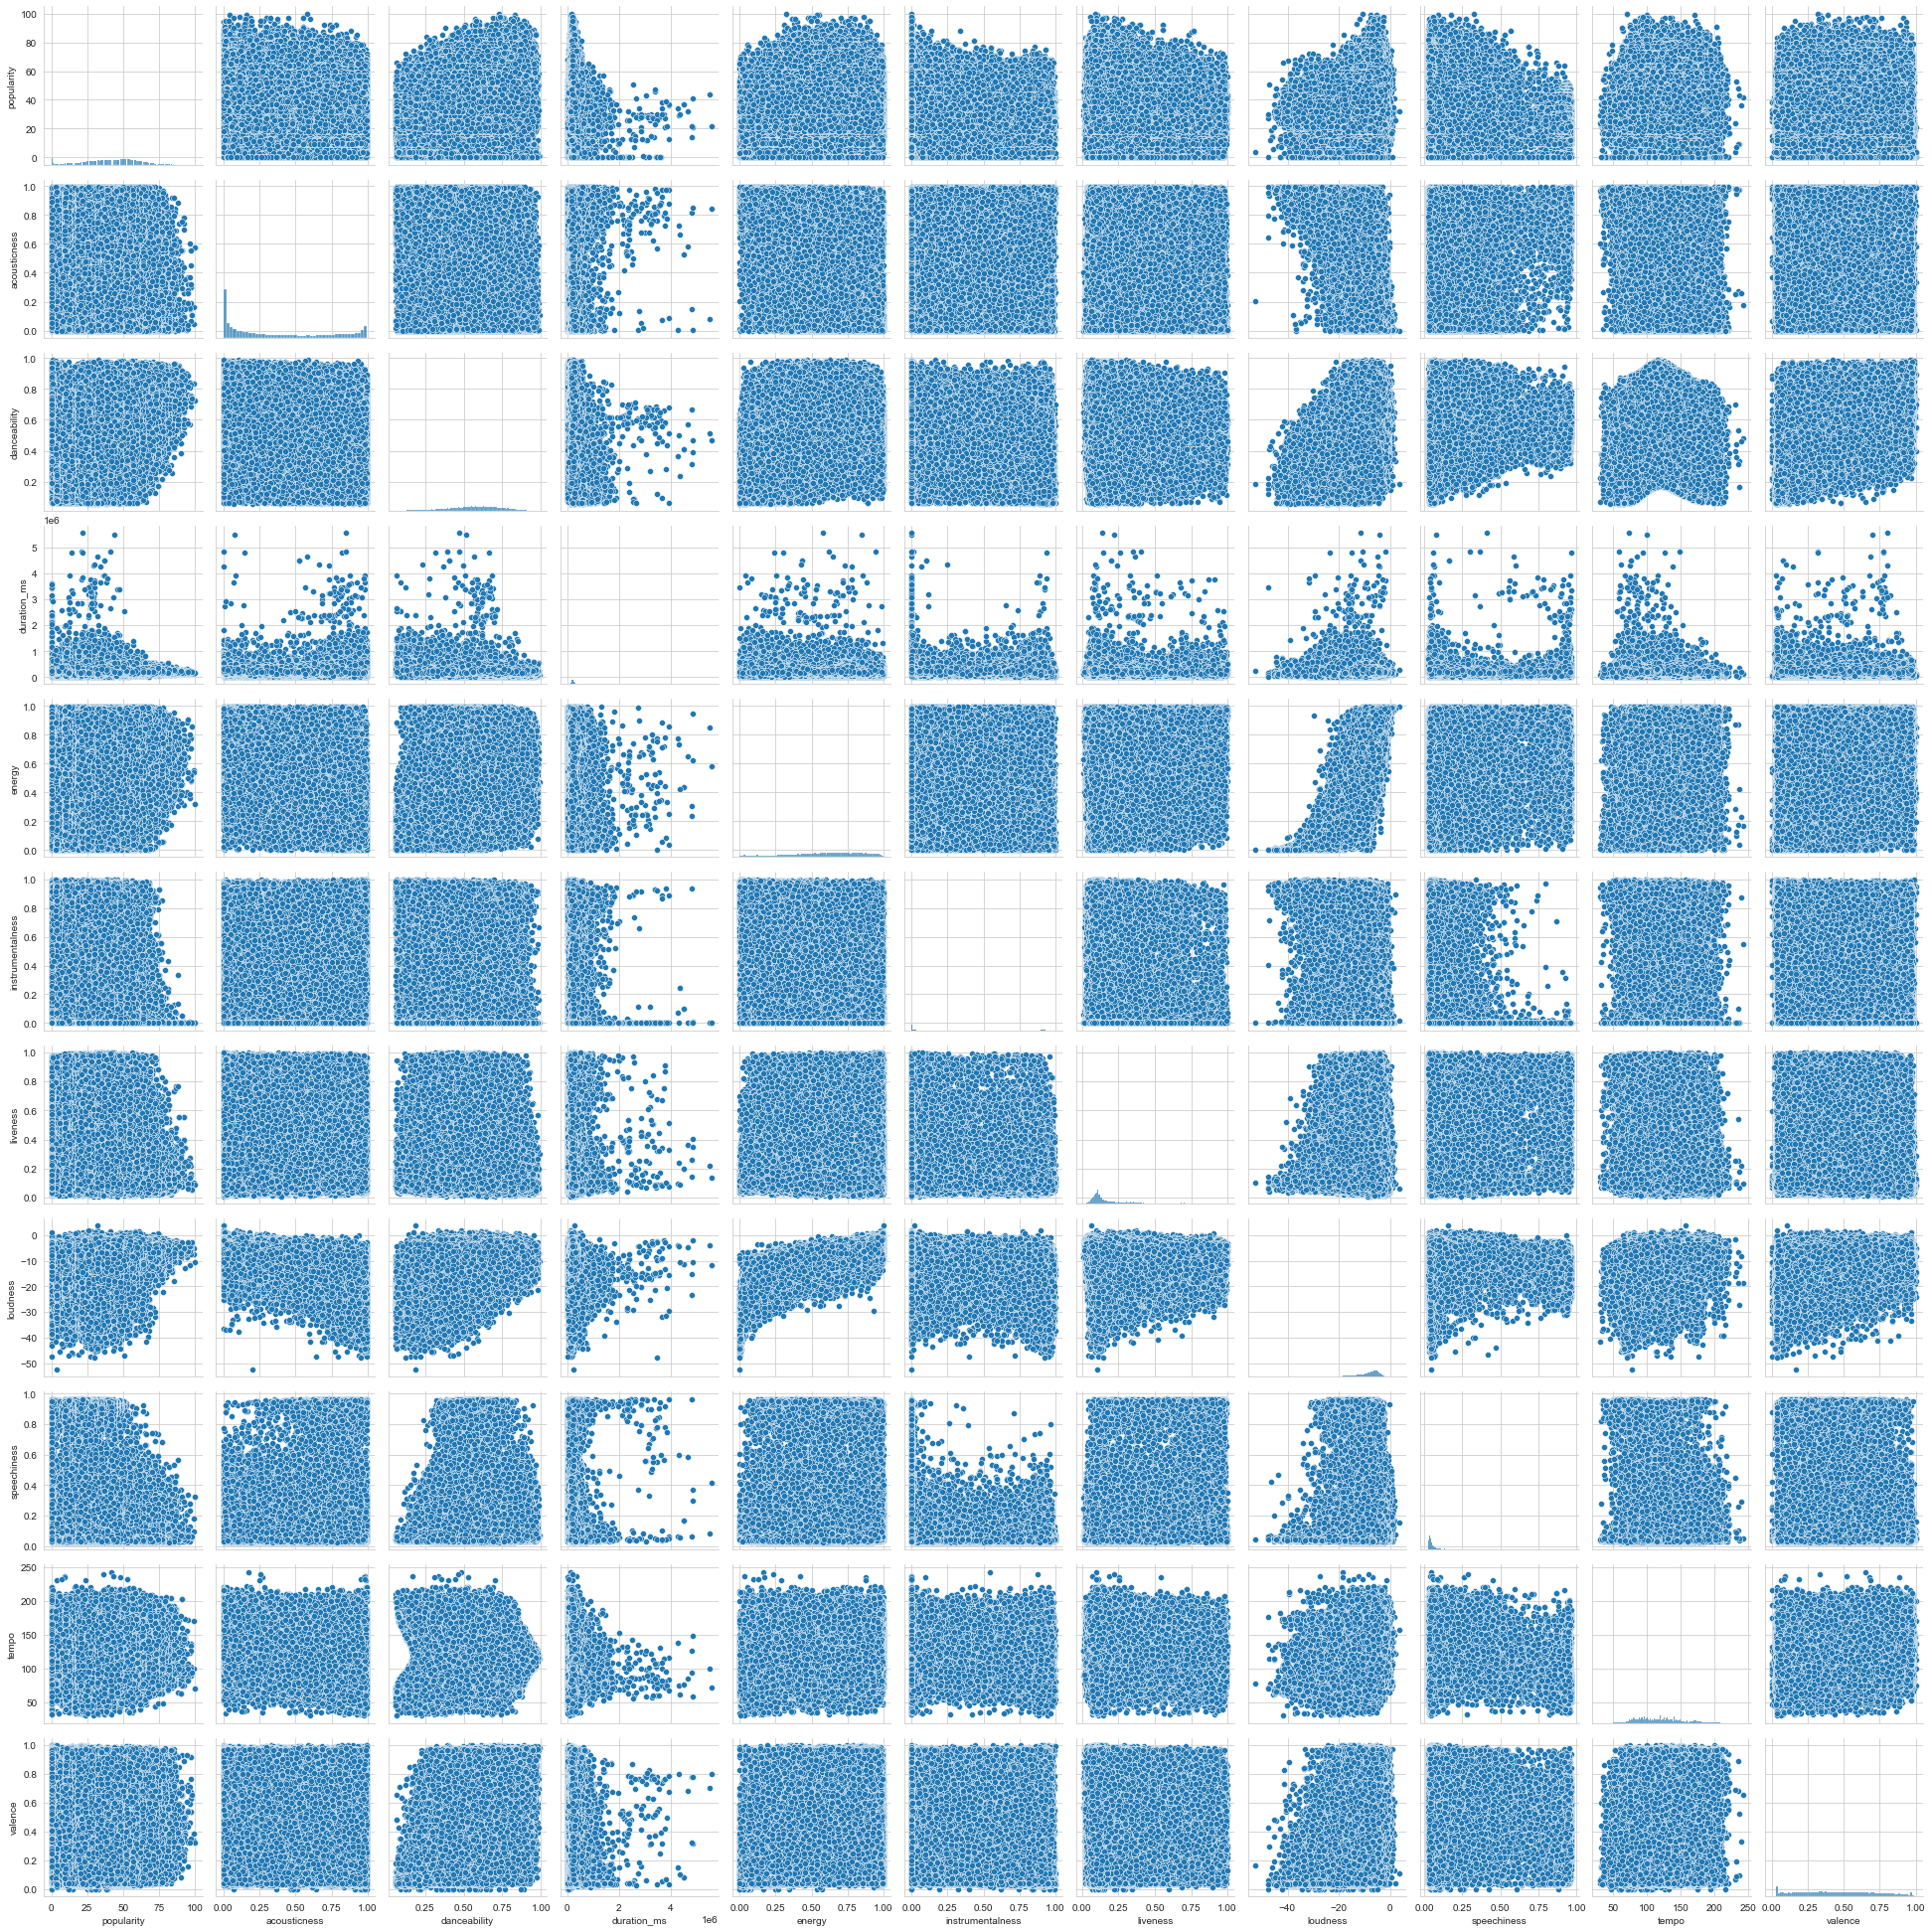

In [18]:
 sns.pairplot(dataframe)

 **6. Feature Engineering**

There are 3 categorical variables (key, mode, and time signature) that need to be converted from text to numbers using one-hot-encoding. We also define popularity as a binary variable. For our purposes, we will define above 57 as "popular" since that's the border of the top 25% of songs and encode that as 1, and below 75 as "not popular" and encode that as 0. 

**Key**: Since there are 12 letter keys (not distinguishing between major and minor), we will convert A to 0, A# to 1, and so on and so forth until B is 12. 

In [19]:
list_of_keys = dataframe['key'].unique()
for i in range(len(list_of_keys)):
    dataframe.loc[dataframe['key'] == list_of_keys[i], 'key'] = i
dataframe.sample(5)

genre             artist_name  \
16519              Dance          Olivia O'Brien   
73841   Children's Music  Kimbo Children's Music   
60718                R&B               Mac Ayres   
227088              Soul              The Brinks   
164692         Reggaeton           Alexis y Fido   

                               track_name                track_id  popularity  \
16519                     Root Beer Float  3bA30uvYoSwHYFW4IOO2O4          59   
73841   Ringing Anvils (Sturdy 2/4 Meter)  5G6Ni2YymDbDRj8k4ztFLk           0   
60718                      Pickled Ginger  54FxjtVjXuY4jn6YFMO1NH          50   
227088                           Comatose  68PPDjziqqiNsQvgbZdSIm          46   
164692                        Invencibles  1jNvYmd53KnvX6XLKHXyJk          25   

        acousticness  danceability  duration_ms  energy  instrumentalness key  \
16519         0.3450         0.746       193747   0.662          0.000000   4   
73841         0.2170         0.679       184413   0.755          0.813000  10   
60718         0.7840         0.492       151433   0.347          0.002840   0   
227088        0.0293         0.528       227983   0.618          0.001100  11   
164692        0.0929         0.893       192907   0.845          0.000042   1   

        liveness  loudness   mode  speechiness    tempo time_signature  \
16519     0.1580    -4.021  Major       0.0513  140.055            4/4   
73841     0.0784   -10.354  Major       0.0418   99.432            4/4   
60718     0.1740   -12.875  Major       0.0764   60.865            4/4   
227088    0.1180    -7.520  Minor       0.0319  176.069            4/4   
164692    0.2770    -5.457  Minor       0.1550   93.012            4/4   

        valence  
16519     0.433  
73841     0.711  
60718     0.284  
227088    0.439  
164692    0.820

**Mode**: We will assign major = 1 and minor = 0. 


In [20]:
dataframe.loc[dataframe["mode"] == 'Major', "mode"] = 1
dataframe.loc[dataframe["mode"] == 'Minor', "mode"] = 0
dataframe.sample(5)


genre    artist_name            track_name  \
85101         R&B     Asian Doll                 Truth   
147708       Jazz            Aim             The Force   
148032       Jazz  Hieroglyphics           At the Helm   
83935         R&B  Kojey Radical  Water (with Mahalia)   
165046  Reggaeton          Yampi   Con la Gorra Empeta   

                      track_id  popularity  acousticness  danceability  \
85101   3Pq7NjrIwAquVGir1z2aud          46        0.3390         0.857   
147708  39qTXRJZd7omJi2KZCd0nJ          50        0.0128         0.922   
148032  66Exwk617LAM1nk3fJflZq          45        0.1400         0.925   
83935   6I15UB0IPWQhJNJEPQ1gLE          56        0.2910         0.678   
165046  4M4yKw0iVPLBpYV9jGhgS6          28        0.0521         0.818   

        duration_ms  energy  instrumentalness key  liveness  loudness mode  \
85101        187397   0.414          0.000000   3    0.1220    -8.493    0   
147708       245947   0.701          0.000822   5    0.0941    -6.679    0   
148032       258440   0.785          0.000005  11    0.1450    -5.164    1   
83935        207947   0.570          0.000000   3    0.2280    -3.922    0   
165046       238040   0.595          0.000000  10    0.2210    -8.195    1   

        speechiness    tempo time_signature  valence  
85101        0.3710  146.098            4/4    0.311  
147708       0.0868  101.996            4/4    0.540  
148032       0.2520   93.011            4/4    0.868  
83935        0.3040  140.115            4/4    0.641  
165046       0.1480   93.979            4/4    0.697

In [21]:
list_of_time_signatures = dataframe['time_signature'].unique()
for i in range(len(list_of_time_signatures)):
    dataframe.loc[dataframe['time_signature'] == list_of_time_signatures[i], 'time_signature'] = i
dataframe.sample(5)

genre     artist_name                        track_name  \
90902     Hip-Hop          A.CHAL                    Round Whippin'   
49909       Blues        Dr. John                    I Been Hoodood   
159078  Reggaeton  Wisin & Yandel            Oye Donde Esta El Amor   
91035     Hip-Hop     Kevin Gates         Go Hard (feat. Rico Love)   
153559       Rock    Fall Out Boy  "The Take Over, The Breaks Over"   

                      track_id  popularity  acousticness  danceability  \
90902   3CCyOANoEy4UvUgPYFv1uV          51       0.00938         0.605   
49909   7wE0MkXKVhcBNBo3NcZHKy          28       0.71700         0.735   
159078  0gJpU8OOqJJBiK7ctXxea8          48       0.15400         0.694   
91035   4kmF8vslxiK5wqCNqoKtrR          47       0.18200         0.474   
153559  3rG8ZkmKHb4Ms6CsSzEITv          60       0.00608         0.596   

        duration_ms  energy  instrumentalness key  liveness  loudness mode  \
90902        209983   0.558          0.004650   1    0.8500    -9.028    0   
49909        194800   0.421          0.052200   8    0.0594   -16.684    1   
159078       300933   0.558          0.000000   1    0.0547    -8.327    0   
91035        219740   0.744          0.000000   5    0.0827    -3.433    0   
153559       213587   0.918          0.000012   5    0.0683    -2.505    1   

        speechiness    tempo time_signature  valence  
90902        0.0365  139.947              0    0.296  
49909        0.0546   96.650              0    0.780  
159078       0.0312  107.969              0    0.614  
91035        0.2260   75.506              0    0.289  
153559       0.0505  149.937              0    0.705

**Popularity**

In [22]:
dataframe.loc[dataframe['popularity'] < 57, 'popularity'] = 0 
dataframe.loc[dataframe['popularity'] >= 57, 'popularity'] = 1
dataframe.loc[dataframe['popularity'] == 1]


genre     artist_name  \
135      R&B   Mary J. Blige   
136      R&B         Rihanna   
137      R&B       Yung Bleu   
138      R&B        Surfaces   
139      R&B  Olivia O'Brien   
...      ...             ...   
230312  Soul     James Brown   
230782  Soul    Alex Hepburn   
230817  Soul    Paloma Faith   
230946  Soul     James Brown   
231493  Soul      Simply Red   

                                               track_name  \
135                            Be Without You - Kendu Mix   
136                                             Desperado   
137            Ice On My Baby (feat. Kevin Gates) - Remix   
138                             Heaven Falls / Fall on Me   
139                                           Love Myself   
...                                                   ...   
230312  Get Up (I Feel Like Being A) Sex Machine - Pts...   
230782                                        If You Stay   
230817                        Make Your Own Kind of Music   
230946                 Papa's Got A Brand New Bag - Pt. 1   
231493                             The Air That I Breathe   

                      track_id  popularity  acousticness  danceability  \
135     2YegxR5As7BeQuVp2U6pek           1       0.08300         0.724   
136     6KFaHC9G178beAp7P0Vi5S           1       0.32300         0.685   
137     6muW8cSjJ3rusKJ0vH5olw           1       0.06750         0.762   
138     7yHqOZfsXYlicyoMt62yC6           1       0.36000         0.563   
139     4XzgjxGKqULifVf7mnDIQK           1       0.59600         0.653   
...                        ...         ...           ...           ...   
230312  6hpmTwgNCz81H2bFEREx29           1       0.27300         0.833   
230782  4sJoIeb8zWYCLHSLM0az3b           1       0.04530         0.719   
230817  5jsFFhABp2FkasGr4QcQd6           1       0.00862         0.567   
230946  5aZzmPUv5a2nna9sxBrmpL           1       0.51900         0.775   
231493  4Sfq2ZuUK9tS66eXqCCKRF           1       0.21000         0.660   

        duration_ms  energy  instrumentalness key  liveness  loudness mode  \
135          246333   0.689          0.000000   8    0.3040    -5.922    0   
136          186467   0.610          0.000000   2    0.1020    -5.221    0   
137          199520   0.520          0.000004   3    0.1140    -5.237    0   
138          240597   0.366          0.002430  11    0.0955    -6.896    0   
139          213947   0.621          0.000000  11    0.0811    -5.721    0   
...             ...     ...               ...  ..       ...       ...  ...   
230312       318800   0.661          0.000149   9    0.2940    -7.595    0   
230782       194554   0.702          0.000013  11    0.0662    -4.577    1   
230817       163840   0.753          0.001830   5    0.1270    -4.823    1   
230946       128973   0.725          0.054100   5    0.0944    -8.369    1   
231493       262827   0.560          0.000040   2    0.0974    -8.894    1   

        speechiness    tempo time_signature  valence  
135          0.1350  146.496              0   0.6930  
136          0.0439   94.384              2   0.3230  
137          0.0959   75.047              0   0.0862  
138          0.1210   85.352              0   0.7680  
139          0.0409  100.006              0   0.4660  
...             ...      ...            ...      ...  
230312       0.1010  108.314              0   0.8580  
230782       0.0357  116.938              0   0.6130  
230817       0.0406  120.098              0   0.5660  
230946       0.0944  129.681              0   0.9140  
231493       0.0287   89.505              0   0.6410  

[49104 rows x 18 columns]

**7. Model Fitting and Predicting** 

We will use the same models as seen in a previous study on predicting song similarity: https://towardsdatascience.com/song-popularity-predictor-1ef69735e380. For simplicity and using binary classification, we define as the top 25% popular songs as "popular", and the bottom 75% popular songs as "not popular".  

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC


from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split



For feature selection, we will select the following features which are only based on music theory and not artist/song information: acousticness, danceability, duration_ms, energy, instrumentalness, key, liveliness, loudness, mode, speeciness, tempo, time_signature, and valence.

In [58]:
features = ["acousticness", "danceability", "duration_ms", "energy", "instrumentalness", "key", "liveness", 
            "mode", "speechiness", "tempo", "time_signature", "valence"]

Next we define 80% of the dataframe for training and 20% of the dataframe for testing. 

In [59]:
training = dataframe.sample(frac = 0.8,random_state = 420)
X_train = training[features]
y_train = training['popularity']
#X_test = dataframe.drop(training.index)[features]

We add a validation dataset using train_test_split. 

In [60]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.2, random_state = 420)

**Decision Tree Classifier**

In [61]:
DT_Model = DecisionTreeClassifier(criterion='entropy', max_depth=5)
DT_Model.fit(X_train, y_train)
DT_Predict = DT_Model.predict(X_valid)
DT_Accuracy = accuracy_score(y_valid, DT_Predict)
print("Accuracy: " + str(DT_Accuracy))

DT_AUC = roc_auc_score(y_valid, DT_Predict) 
print("AUC: " + str(DT_AUC))

Accuracy: 0.7895316360511333
AUC: 0.5


**8. Model Performance Summary**

**9. Conclusion**

Using a dataset of 228,000 Spotify Tracks, we were able to predict popularity (greater than 57 popularity) using audio-based metrics such as key, mode, and danceability without external metrics such as artist name, genre, and release date. The Random Forest Classifier was the best performing algorithm with 92.0% accuracy and 86.4% AUC. The Decision Tree Classifier was the second best performing algorithm with 87.5% accuracy and 85.8% AUC.

Moving forward, I will use a larger Spotify database by using the Spotify API to collect my own data, and explore different algorithms to predict popularity score rather than doing binary classification. 

**10. References**

1. Cher Lau-Cher Lau - https://towardsdatascience.com/5-steps-of-a-data-science-project-lifecycle-26c50372b492
2. Are Hit Songs Becoming Less Musically Diverse?
Andrew Thompson-Matt Daniels-Damián Gaume - https://pudding.cool/2018/05/similarity/
3. Song Popularity Predictor
Mohamed Nasreldin-Mohamed Nasreldin - https://towardsdatascience.com/song-popularity-predictor-1ef69735e380
4. Titanic: Beginner's Guide with Sklearn
https://www.kaggle.com/ialimustafa/titanic-beginner-s-guide-with-sklearn/data
5. **Data Source:** https://www.kaggle.com/zaheenhamidani/ultimate-spotify-tracks-db#SpotifyFeatures.csv